In [39]:
# importing libraries
import pandas as pd
import numpy as np

# for Data visualization
import matplotlib.pyplot as plt

# for date time comparison
import datetime

In [40]:
from google.colab import drive

In [41]:
# mounting drive path to google drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [42]:
# Fetching dataset from gdrive
motor_vehicle = pd.read_csv('/content/gdrive/My Drive/UTA/Motor_Vehicle_Collisions_-_Vehicles.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [43]:
# Converting CRASH_DATE values to datetime objects for comparison inshort date time operation
motor_vehicle['CRASH_DATE'] = pd.to_datetime(motor_vehicle['CRASH_DATE'])
start_date = '2016-05-01'
end_date = '2018-04-30'

# Has a motor_vehicle data ranging from start date and end date
mvc_data = motor_vehicle.query('CRASH_DATE >= @start_date and CRASH_DATE <= @end_date') 

In [44]:
# filtered rows have non nan values
mvc_data = mvc_data.dropna(subset=['VEHICLE_TYPE','VEHICLE_MAKE','CRASH_DATE'])

In [45]:
# importing re modules for performing regex opertaion
import re  

# Function for changing the vehicle name 
def Clean_names(vehicle_name):

    if re.search('-.*', vehicle_name):  
        
        pos = re.search('-.*', vehicle_name).start()  
        
        return vehicle_name[:pos].rstrip()  
    else:
        
        return vehicle_name.rstrip()

# Function for changing vehicle_make values to FORD,NISS,TOYT,MAZD 
mvc_data['VEHICLE_MAKE'] = mvc_data['VEHICLE_MAKE'].apply(Clean_names)

In [46]:
mvc_data

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
5,17044639,3434155,2016-05-02,17:35,219456,NY,4 dr sedan,MERZ,NaN,2015.0,...,Merging,Right Front Bumper,Right Front Bumper,Right Front Quarter Panel,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unsafe Lane Changing
7,17303317,3503027,2016-08-18,12:39,672828,NY,Station Wagon/Sport Utility Vehicle,FORD,NaN,2005.0,...,Going Straight Ahead,Center Front End,Center Front End,No Damage,No Damage,No Damage,N,NaN,Driver Inattention/Distraction,Unspecified
10,17285715,3487936,2016-07-22,15:40,554272,NY,Convertible,VOLK,NaN,2013.0,...,Stopped in Traffic,Right Rear Bumper,Right Rear Bumper,Center Back End,Left Rear Bumper,NaN,N,NaN,Unspecified,Unspecified
12,17307366,3499697,2016-08-13,21:05,650962,NY,Sedan,NISS,NaN,2015.0,...,Going Straight Ahead,Left Side Doors,Left Side Doors,Left Rear Quarter Panel,NaN,NaN,N,NaN,Unspecified,Unspecified
16,17401424,3516125,2016-09-08,14:40,764668,NY,Station Wagon/Sport Utility Vehicle,LINC,NaN,2015.0,...,Stopped in Traffic,Right Rear Quarter Panel,Right Rear Quarter Panel,Right Rear Bumper,No Damage,No Damage,N,NaN,Unspecified,Unspecified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3692960,20114934,3692426,2017-06-16,16:53,f9fdc931-9718-4dc6-b3a5-fb37a628ef4a,NJ,Sedan,NISS,NaN,2002.0,...,Going Straight Ahead,Left Side Doors,Left Side Doors,Left Rear Quarter Panel,Left Rear Bumper,Center Back End,N,NaN,Driver Inexperience,Unspecified
3696317,20112801,3871272,2018-03-26,16:15,4f442edd-5dcf-40bc-87ca-19b8abc60bea,NJ,Station Wagon/Sport Utility Vehicle,freightliner,NaN,2005.0,...,Backing,Center Back End,NaN,NaN,NaN,NaN,N,NaN,Backing Unsafely,Unspecified
3697381,20119416,3727452,2017-08-05,19:32,61cb58d7-3588-4875-9636-5584f4e73d9f,NJ,Station Wagon/Sport Utility Vehicle,LINC,NaN,2004.0,...,Going Straight Ahead,Right Front Quarter Panel,Left Side Doors,Left Front Quarter Panel,Left Front Bumper,Roof,N,NaN,Unspecified,Unspecified
3701045,20119387,3648680,2017-04-08,20:35,04567c4f-d98b-42f3-a81c-a53dbf255e8e,NY,Sedan,HYUN,NaN,2006.0,...,Parked,Right Rear Quarter Panel,Right Rear Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified




                        TOYT   FORD   NISS  MAZD
May 2016 - April 2017  72239  42200  42506  4100
May 2017 - April 2018  75724  41027  43914  4253





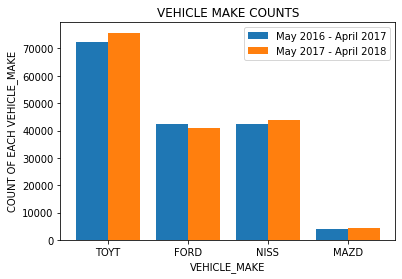

In [47]:
# creating sample
# sample_df=mvc_data.sample(100, random_state = 8242000)


sample_df=mvc_data

# creating year and month column
sample_df['YEAR'], sample_df['MONTH'] = sample_df['CRASH_DATE'].dt.year, sample_df['CRASH_DATE'].dt.month

# splitting dataset to 2 years
# May 2016 to April 2017
end_date = '2017-04-30'
sample_df_2016_17 = sample_df.query('CRASH_DATE <= @end_date')

# May 2017 to April 2018
start_date = '2017-05-01'
sample_df_2017_18 = sample_df.query('CRASH_DATE >= @start_date') 

# counting according to Vehicle_Make
# making a csv files for avoiding indexing problem
vehicle_make_16 = sample_df_2016_17.groupby('VEHICLE_MAKE').count()
vehicle_make_16.to_csv('vm16.csv')

vehicle_make_17 = sample_df_2017_18.groupby('VEHICLE_MAKE').count()
vehicle_make_17.to_csv('vm17.csv')

# saving yearwise data for given vehicle make 
X = ['TOYT','FORD','NISS','MAZD']

x_2016 = []
x_2017 = []

vehicle_make_16 = pd.read_csv('vm16.csv')
vehicle_make_2016 = (vehicle_make_16[vehicle_make_16['VEHICLE_MAKE'].str.contains('TOYT|FORD|NISS|MAZD', regex = True)]).iloc[:,:2]
vehicle_make_2016_d = (vehicle_make_2016.set_index('VEHICLE_MAKE').to_dict())['UNIQUE_ID']

for i in X:
  if i in vehicle_make_2016_d.keys():
    x_2016.append(vehicle_make_2016_d[i])
  else:
    x_2016.append(0)

vehicle_make_17 = pd.read_csv('vm17.csv')
vehicle_make_2017 = (vehicle_make_17[vehicle_make_17['VEHICLE_MAKE'].str.contains('TOYT|FORD|NISS|MAZD', regex = True)]).iloc[:,:2]
vehicle_make_2017_d = (vehicle_make_2017.set_index('VEHICLE_MAKE').to_dict())['UNIQUE_ID']

for i in X:
  if i in vehicle_make_2017_d.keys():
    x_2017.append(vehicle_make_2017_d[i])
  else:
    x_2017.append(0)

# plotting bar graph
X_axis = np.arange(len(X))

plt.bar(X_axis -0.2,  x_2016, 0.4, 
	label = 'May 2016 - April 2017')
plt.bar(X_axis + 0.2,  x_2017, 0.4, 
	label = 'May 2017 - April 2018')
print("\n")
data = pd.DataFrame([x_2016,x_2017], index = ['May 2016 - April 2017', 'May 2017 - April 2018'], columns = X)
print(data)
print("\n\n")
plt.xticks(X_axis, X)
plt.xlabel("VEHICLE_MAKE")
plt.ylabel("COUNT OF EACH VEHICLE_MAKE")
plt.title("VEHICLE MAKE COUNTS")
plt.legend()
plt.show()

In [48]:
# separated samples according to 
end_date = '2016-12-12'
start_date= '2017-01-01'
sample_df_2016 = sample_df.query('CRASH_DATE <= @end_date')
end_date = '2017-12-12'
sample_df_2017 = sample_df.query('CRASH_DATE >= @start_date and CRASH_DATE <= @end_date') 
start_date= '2018-01-01'
end_date = '2018-12-12'
sample_df_2018 = sample_df.query('CRASH_DATE >= @start_date and CRASH_DATE <= @end_date') 




                  TOYT   FORD   NISS  MAZD
May to Dec 2016  45671  27304  27018  2634
2017             70571  39233  41184  3958
May to Dec 2018  23959  12579  13662  1320





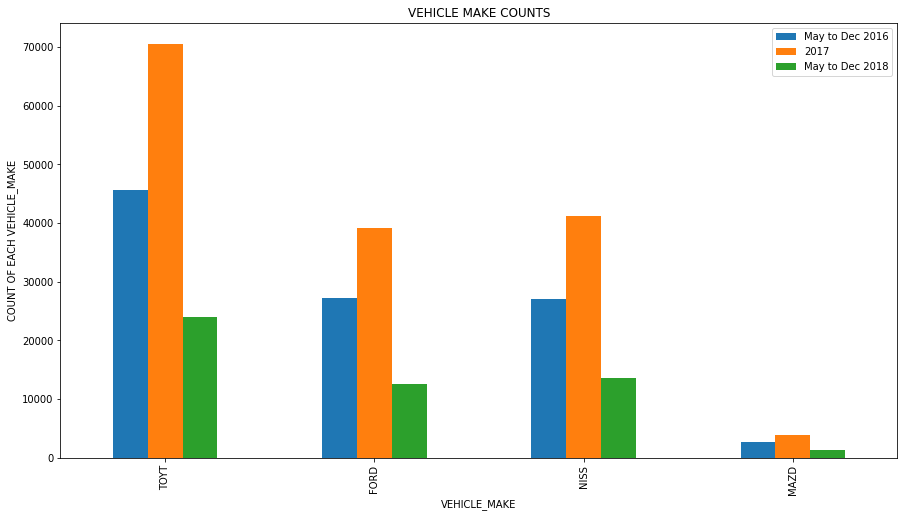

In [49]:
# same analysis but years are arranged as 2016,2017,2018
vehicle_make_16 = sample_df_2016.groupby('VEHICLE_MAKE').count()
vehicle_make_16.to_csv('vm16.csv')
vehicle_make_17 = sample_df_2017.groupby('VEHICLE_MAKE').count()
vehicle_make_17.to_csv('vm17.csv')
vehicle_make_18 = sample_df_2018.groupby('VEHICLE_MAKE').count()
vehicle_make_18.to_csv('vm18.csv')

X = ['TOYT','FORD','NISS','MAZD']
x_2016 = []
x_2017 = []
x_2018 = []
vehicle_make_16 = pd.read_csv('vm16.csv')
vehicle_make_2016 = (vehicle_make_16[vehicle_make_16['VEHICLE_MAKE'].str.contains('TOYT|FORD|NISS|MAZD', regex = True)]).iloc[:,:2]
vehicle_make_2016_d = (vehicle_make_2016.set_index('VEHICLE_MAKE').to_dict())['UNIQUE_ID']

for i in X:
  if i in vehicle_make_2016_d.keys():
    x_2016.append(vehicle_make_2016_d[i])
  else:
    x_2016.append(0)

vehicle_make_17 = pd.read_csv('vm17.csv')
vehicle_make_2017 = (vehicle_make_17[vehicle_make_17['VEHICLE_MAKE'].str.contains('TOYT|FORD|NISS|MAZD', regex = True)]).iloc[:,:2]
vehicle_make_2017_d = (vehicle_make_2017.set_index('VEHICLE_MAKE').to_dict())['UNIQUE_ID']

for i in X:
  if i in vehicle_make_2017_d.keys():
    x_2017.append(vehicle_make_2017_d[i])
  else:
    x_2017.append(0)

vehicle_make_18 = pd.read_csv('vm18.csv')
vehicle_make_2018 = (vehicle_make_18[vehicle_make_18['VEHICLE_MAKE'].str.contains('TOYT|FORD|NISS|MAZD', regex = True)]).iloc[:,:2]
vehicle_make_2018_d = (vehicle_make_2018.set_index('VEHICLE_MAKE').to_dict())['UNIQUE_ID']

for i in X:
  if i in vehicle_make_2018_d.keys():
    x_2018.append(vehicle_make_2018_d[i])
  else:
    x_2018.append(0)

data_mvc_yearly = pd.DataFrame([x_2016,x_2017,x_2018], columns = X , index = ['May to Dec 2016','2017','May to Dec 2018'])
data_mvc_yearly.to_excel('hi.xlsx',columns = X , index = ['May to Dec 2016','2017','May to Dec 2018'])
print("\n\n")
print(data_mvc_yearly)
print("\n\n")
data_mvc_yearly.T.plot(kind='bar',figsize=[15,8])
plt.xticks(rotation = 90)
plt.xlabel("VEHICLE_MAKE")
plt.ylabel("COUNT OF EACH VEHICLE_MAKE")
plt.title("VEHICLE MAKE COUNTS")
plt.legend()


plt.show()

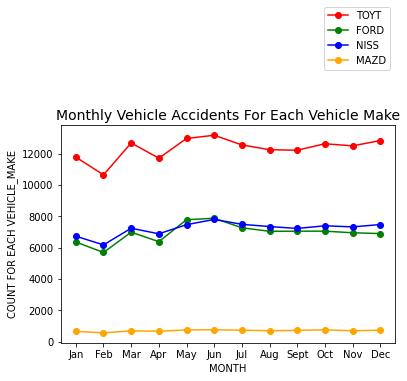




        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug   Sept    Oct  \
TOYT  11782  10645  12685  11712  12969  13176  12560  12252  12219  12632   
FORD   6359   5690   6988   6381   7781   7876   7269   7043   7050   7051   
NISS   6731   6175   7239   6883   7464   7801   7488   7346   7223   7395   
MAZD    657    554    688    664    746    756    725    696    715    751   

        Nov    Dec  
TOYT  12498  12835  
FORD   6950   6896  
NISS   7325   7472  
MAZD    693    725  


In [50]:
toyt_data = sample_df[sample_df['VEHICLE_MAKE'].str.contains('TOYT', regex = True)]
ford_data = sample_df[sample_df['VEHICLE_MAKE'].str.contains('FORD', regex = True)]
niss_data = sample_df[sample_df['VEHICLE_MAKE'].str.contains('NISS', regex = True)]
mazd_data = sample_df[sample_df['VEHICLE_MAKE'].str.contains('MAZD', regex = True)]

toyt_data = (toyt_data.groupby('MONTH').count())
toyt_data.to_csv('toyt.csv')
toyt_data = pd.read_csv('toyt.csv')
toyt_data = toyt_data.iloc[:,:2]


ford_data = (ford_data.groupby('MONTH').count())
ford_data.to_csv('ford.csv')
ford_data = pd.read_csv('ford.csv')
ford_data = ford_data.iloc[:,:2]


niss_data = (niss_data.groupby('MONTH').count())
niss_data.to_csv('niss.csv')
niss_data = pd.read_csv('niss.csv')
niss_data = niss_data.iloc[:,:2]


mazd_data = (mazd_data.groupby('MONTH').count())
mazd_data.to_csv('mazd.csv')
mazd_data = pd.read_csv('mazd.csv')
mazd_data = mazd_data.iloc[:,:2]

X = [1,2,3,4,5,6,7,8,9,10,11,12]
X_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
toyt_data_d = (toyt_data.set_index('MONTH').to_dict())['UNIQUE_ID']
x_toyt=[]
for i in X:
  if i in toyt_data_d.keys():
    x_toyt.append(toyt_data_d[i])
  else:
    x_toyt.append(0)

ford_data_d = (ford_data.set_index('MONTH').to_dict())['UNIQUE_ID']
x_ford=[]
for i in X:
  if i in ford_data_d.keys():
    x_ford.append(ford_data_d[i])
  else:
    x_ford.append(0)

niss_data_d = (niss_data.set_index('MONTH').to_dict())['UNIQUE_ID']
x_niss=[]
for i in X:
  if i in niss_data_d.keys():
    x_niss.append(niss_data_d[i])
  else:
    x_niss.append(0)

mazd_data_d = (mazd_data.set_index('MONTH').to_dict())['UNIQUE_ID']
x_mazd=[]
for i in X:
  if i in mazd_data_d.keys():
    x_mazd.append(mazd_data_d[i])
  else:
    x_mazd.append(0)

plt.plot(X_axis, x_toyt ,label = "TOYT", color='red', marker='o')
plt.plot(X_axis, x_ford ,label = 'FORD', color='green', marker='o')
plt.plot(X_axis, x_niss ,label = 'NISS', color='blue', marker='o')
plt.plot(X_axis, x_mazd ,label = 'MAZD', color='orange', marker='o')
plt.title('Monthly Vehicle Accidents For Each Vehicle Make', fontsize=14)
plt.xlabel('MONTH', fontsize=10)
plt.ylabel('COUNT FOR EACH VEHICLE_MAKE', fontsize=10)
plt.legend(loc='center right',bbox_to_anchor=(1., 1.4))
plt.show()
print('\n\n')
print(pd.DataFrame([x_toyt, x_ford, x_niss, x_mazd], index = ['TOYT','FORD','NISS','MAZD'], columns = X_axis))

In [51]:
# Cleaning types that is merging the similar types
def Clean_types(vehicle_type):

  if re.search('sedan', vehicle_type.lower().rstrip()):       
    return 'Sedans' 
  elif 'SPORT UTILITY / STATION WAGON'==vehicle_type.rstrip() or 'Station Wagon/Sport Utility Vehicle' == vehicle_type.rstrip():
    return 'Sport Utility Vehicle'
  elif 'TAXI'==vehicle_type.rstrip().upper() or 'Taxi'==vehicle_type.rstrip().capitalize():
    return 'Taxi'
  elif 'Pick‐up Truck'.lower()==vehicle_type.rstrip().lower() or 'Box truck'.lower() == vehicle_type.rstrip().lower(): #ought to add lower()
    return 'Truck'
  elif 'PASSENGER VEHICLE'==vehicle_type.rstrip().upper() or 'VAN'==vehicle_type.rstrip().upper(): # or 'FIRE TRUCK' ==vehicle_type.rstrip().upper() 
    return vehicle_type.upper()
  elif  'Bike'==vehicle_type.rstrip().capitalize() or 'Bus'==vehicle_type.rstrip().capitalize() or 'MotorCycle'==vehicle_type.rstrip().capitalize() or 'Bicycle'==vehicle_type.rstrip().capitalize() or 'Ambulance' == vehicle_type.rstrip().capitalize() or 'Convertible' == vehicle_type.rstrip().capitalize():
    return vehicle_type.capitalize()
  else:
    return "Others"
  
mvc_data['VEHICLE_TYPE'] = mvc_data['VEHICLE_TYPE'].apply(Clean_types)

In [52]:
l1_data = mvc_data.groupby('VEHICLE_TYPE').count()
l1_data.to_csv('query3.csv') 

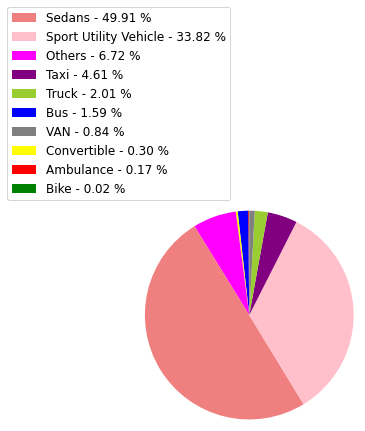

In [53]:
# plotting pie chart 
l1_data = (pd.read_csv('query3.csv')).iloc[:,0:2]
l1_data

data = np.array(list(l1_data['UNIQUE_ID']))
label = list(l1_data['VEHICLE_TYPE'])
 
colors = ['red','green','blue','yellow','magenta','lightcoral','pink', 'purple','yellowgreen','grey','violet']
porcent = 100*data/data.sum()

vehicle_type_count, texts = plt.pie(data, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(label, porcent)]

sort_legend = True
if sort_legend:
    vehicle_type_count, labels, dummy =  zip(*sorted(zip(vehicle_type_count, labels, data), key=lambda labels: labels[2], reverse=True))

plt.legend(vehicle_type_count, labels, loc='lower center', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)

# plt.title()

plt.show()

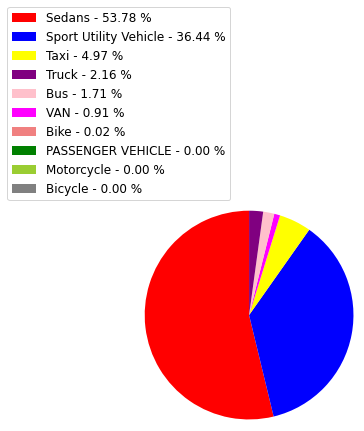

In [54]:
# plotting pie chart
sample_label = ['Sedans','PASSENGER VEHICLE', 'Sport Utility Vehicle', 'Taxi', 'VAN','Bike','Bus', 'Truck', 'Motorcycle','Bicycle']
sample_d = (l1_data.set_index('VEHICLE_TYPE').to_dict())['UNIQUE_ID']
sample_data_count =[]
for i in (sample_label):
  if i in sample_d.keys():
    sample_data_count.append(sample_d[i])
  else:
    sample_data_count.append(0)
sample_data_count = np.array(sample_data_count)
porcent = 100*sample_data_count/sample_data_count.sum()

vehicle_type_count, texts = plt.pie(sample_data_count, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(sample_label, porcent)]

sort_legend = True
if sort_legend:
    vehicle_type_count, labels, dummy =  zip(*sorted(zip(vehicle_type_count, labels, sample_data_count),
                                          key=lambda labels: labels[2],
                                          reverse=True))

plt.legend(vehicle_type_count, labels, loc='lower center', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)

plt.show()